In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
brands=pd.read_csv("/Users/tsveti/Desktop/eniac-clean-data/tables/brands_clean.csv")
orderlines=pd.read_csv("/Users/tsveti/Desktop/eniac-clean-data/tables/orderlines_clean.csv")
orders=pd.read_csv("/Users/tsveti/Desktop/eniac-clean-data/tables/orders_clean.csv")
products=pd.read_csv("/Users/tsveti/Desktop/eniac-clean-data/tables/products_clean.csv")
pd.set_option("display.float_format", lambda x: "%.2f" % x)
pd.set_option("display.max_rows", 1000)

In [36]:
orders_mod=orders.copy()

In [37]:
orders_completed=orders.loc[orders_mod["state"] == "Completed"]

In [38]:
orders_completed

,Unnamed: 0,order_id,created_date,total_paid,state
1,1,241423,2017-11-06 13:10:02,136.15,Completed
2,2,242832,2017-12-31 17:40:03,15.76,Completed
3,3,243330,2017-02-16 10:59:38,84.98,Completed
5,5,245275,2017-06-28 11:35:37,149.00,Completed
6,6,245595,2017-01-21 12:52:47,112.97,Completed
...,...,...,...,...,...
226549,226549,527042,2018-03-14 11:47:50,18.98,Completed
226577,226577,527070,2018-03-14 11:50:48,24.97,Completed
226581,226581,527074,2018-03-14 11:51:42,24.97,Completed
226603,226603,527096,2018-03-14 11:58:40,34.96,Completed


In [39]:
orderlines_mod=orderlines.copy()

In [40]:
all_sales=orderlines_mod.merge(
    orders_completed, 
    how="inner", 
    left_on="id_order", 
    right_on="order_id"
)

In [41]:
all_sales.head(3)

,Unnamed: 0_x,id,id_order,product_id,product_quantity,sku,unit_price,date,Unnamed: 0_y,order_id,created_date,total_paid,state
0,7,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,207,299545,2017-01-01 01:51:47,51.48,Completed
1,8,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34,208,299546,2017-01-01 01:57:34,18.99,Completed
2,9,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11,147,295347,2017-01-01 02:02:38,72.19,Completed


In [48]:
orders_mod

,Unnamed: 0,order_id,created_date,total_paid,state
0,0,241319,2017-01-02 13:35:40,44.99,Cancelled
1,1,241423,2017-11-06 13:10:02,136.15,Completed
2,2,242832,2017-12-31 17:40:03,15.76,Completed
3,3,243330,2017-02-16 10:59:38,84.98,Completed
4,4,243784,2017-11-24 13:35:19,157.86,Cancelled
...,...,...,...,...,...
226904,226904,527397,2018-03-14 13:56:38,42.99,Place Order
226905,226905,527398,2018-03-14 13:57:25,42.99,Shopping Basket
226906,226906,527399,2018-03-14 13:57:34,141.58,Shopping Basket
226907,226907,527400,2018-03-14 13:57:41,19.98,Shopping Basket


Grouping all orders with different status from orders table.

In [49]:
status_order=orders_mod.groupby("state")["total_paid"].sum()

In [50]:
status_order

state
Cancelled          5545816.86
Completed         15910079.24
Pending            4703300.72
Place Order       17087858.32
Shopping Basket   85912559.93
Name: total_paid, dtype: float64

<Axes: xlabel='state', ylabel='total_paid'>

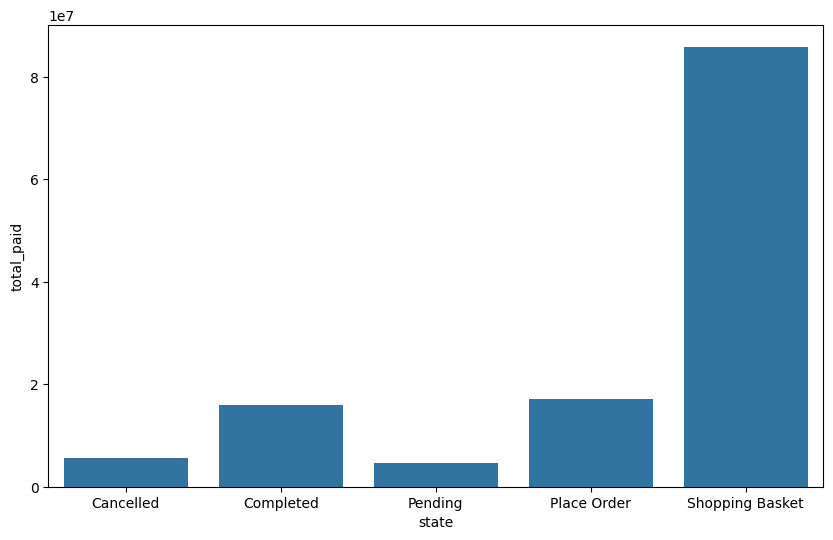

In [56]:
plt.figure(figsize=(10,6))
sns.barplot(data=status_order)


Number of orders in the different status

In [53]:
status_orders = orders_mod.groupby('state')['order_id'].count().reset_index()

In [57]:
status_orders

,state,order_id
0,Cancelled,7233
1,Completed,46605
2,Pending,14379
3,Place Order,40883
4,Shopping Basket,117809


<Axes: xlabel='state', ylabel='order_id'>

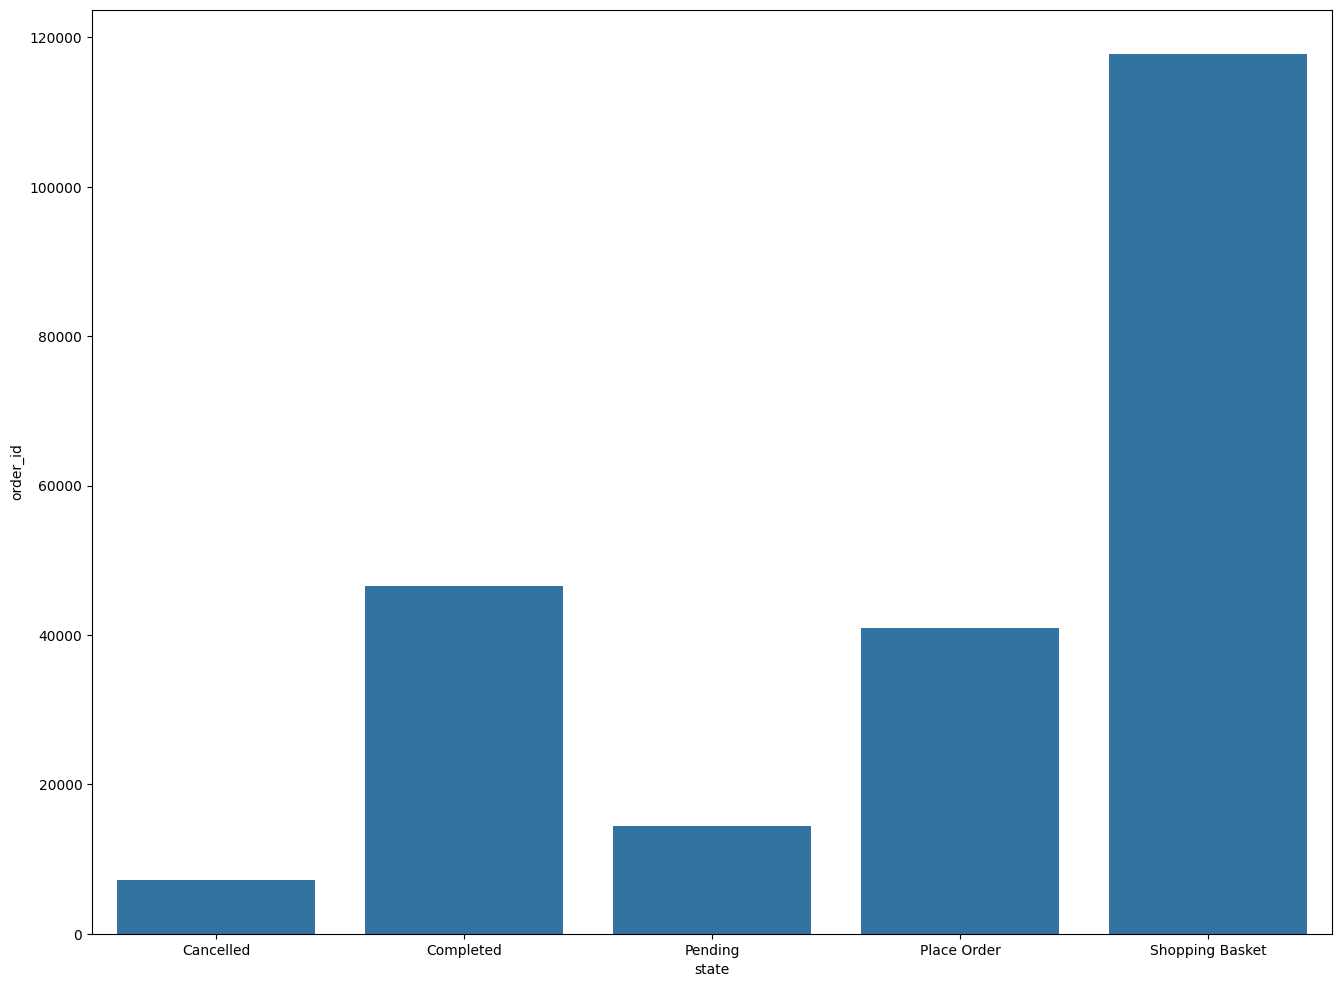

In [62]:
plt.figure(figsize=(16,12))
sns.barplot(data=status_orders, x="state", y="order_id")